In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import power_transform as PT
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [101]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Checking the data

In [102]:
df.shape

(30, 17)

Checking the shape of the dataframe

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


Some general observations:
There is a lot of difference between mean and standard deviation for most of the columns, so that shows skewness in the data
which will be removed in further steps. 
Except shutouts (CG) none of the column have minimum value as 0.

In [104]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No Null values

In [105]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns have proper data types. As we have got all the basic info the dataset we can move to visualisation part

In [106]:
df_features=df.drop(columns=["W"],axis=1)

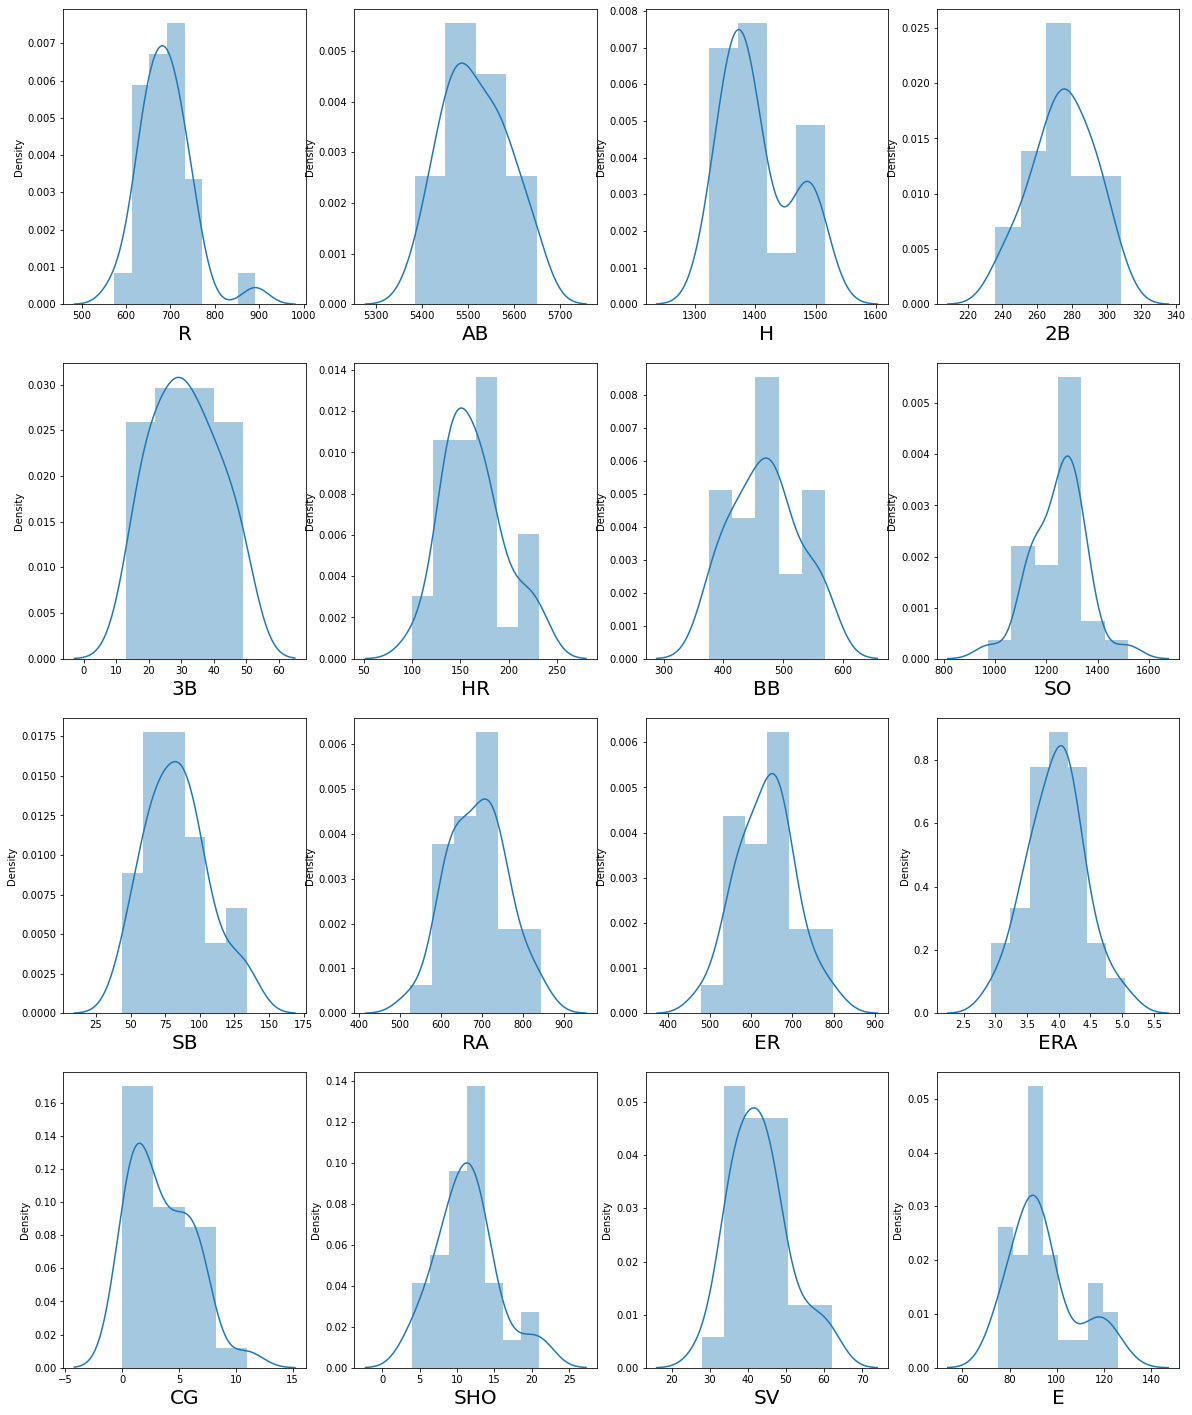

In [107]:
plt.figure(figsize=(20,25))
pltno=1
for column in df_features:
    if pltno<=16:
        ax=plt.subplot(4,4,pltno)
        sns.distplot(df_features[column])
        plt.xlabel(column,fontsize=20)
    pltno+=1
plt.show()

As all the fields are continuous features, we plotted the dist plot to see the skewness of each column. Most of the column
seems to be in normal distribution except column CG,2B,SO which are left skewed and HR,ERA, SHO and E are right skewed.

we need to check the correlation of all features with the traget column W

In [108]:
df.corr()["W"].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

So from correlation values we can see that ERA, RA and ER are highly negatively correlated with target column W whereas
column SHO,BB,SV are highly postiviely correlated with W. Column R and 2B are lightly positively related to W.

The remaining features have less to no linear correlation with no of Wins

The dataset set has too much randomness.

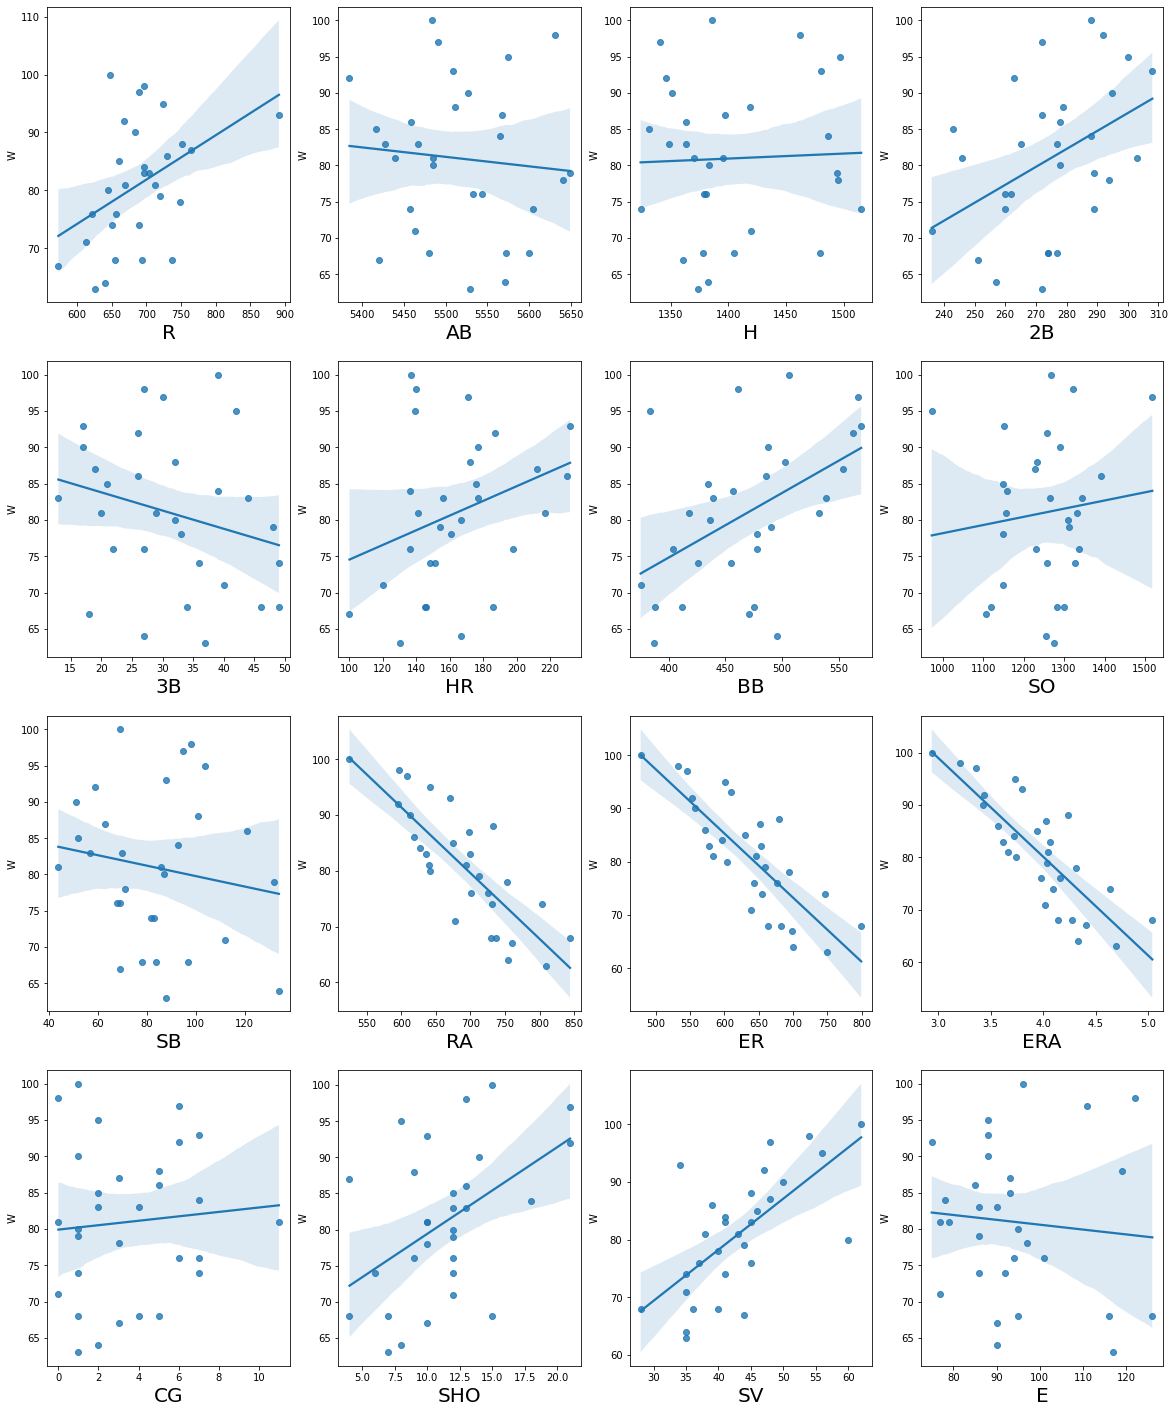

In [109]:
plt.figure(figsize=(20,25))
pltno=1
for column in df_features:
    if pltno<=16:
        ax=plt.subplot(4,4,pltno)
        sns.regplot(x=column,y='W',data=df)
        plt.xlabel(column,fontsize=20)
    pltno+=1
plt.show()
        

Now we will see outliers in the data

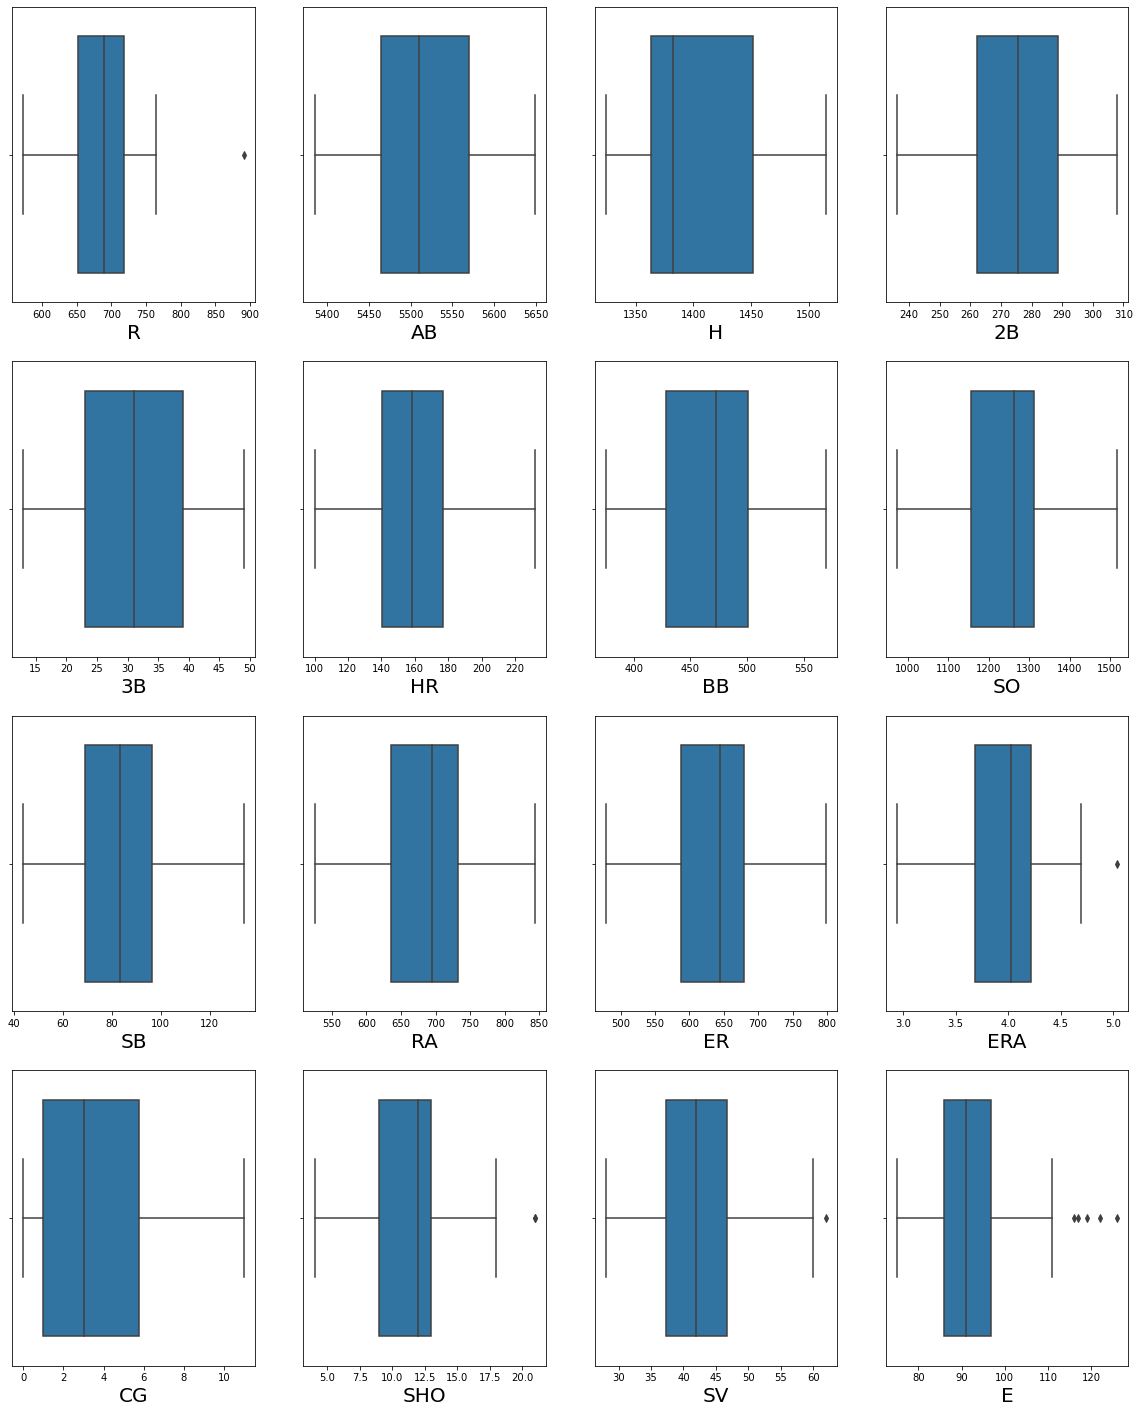

In [110]:
plt.figure(figsize=(20,25))
pltno=1
for column in df_features:
    if pltno<=16:
        ax=plt.subplot(4,4,pltno)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=20)
    pltno+=1
plt.show()

There are outliers in column R,ERA, SHO, SV and E. We will remove these outliers in further steps.

In [111]:


pt=pd.DataFrame()
for i in df_baseball_final.columns:
    if df_baseball_final[i].min()<=0:
        pt1=(df_baseball_final[i]-df_baseball_final[i].min()+0.0001)
    else:
        pt1=df_baseball_final[i]
    pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)
X=PT(pt)


df_z=df_baseball
z=np.abs(stats.zscore(df_z))
df_baseball=df_z.loc[(z<3).all(axis=1)]

ss=StandardScaler()
x1=ss.fit_transform(X)
df_baseball=pd.DataFrame(X,columns=df_baseball_final.columns)



As we can see the skewness is removed from the dataset

In [112]:
X=df_baseball.drop(['W'], axis=1)
Y=df_baseball[['W']]


Now we will test different regression models on our data to determine which model gives the best result

In [113]:

max_r_score=0
for r_state in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
    lr = linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  1  is:  0.8646412007391393
r2_score corresponding to random state:  2  is:  0.45255777630759697
r2_score corresponding to random state:  3  is:  0.9327056464011633
r2_score corresponding to random state:  4  is:  0.7247017413676644
r2_score corresponding to random state:  5  is:  0.6131573305399192
r2_score corresponding to random state:  6  is:  0.8273220640839067
r2_score corresponding to random state:  7  is:  0.49646028330207037
r2_score corresponding to random state:  8  is:  0.7402838992159426
r2_score corresponding to random state:  9  is:  0.3431088462627838
r2_score corresponding to random state:  10  is:  0.2991514595755729
r2_score corresponding to random state:  11  is:  -0.04514016013497124
r2_score corresponding to random state:  12  is:  0.6711787537795225
r2_score corresponding to random state:  13  is:  0.8548192653436392
r2_score corresponding to random state:  14  is:  0.833181624906392
r2_score corresponding to random state: 

In [114]:
cross_val_score(lr, X, Y, cv=5,scoring="r2").mean()

0.46679302970669634

In [115]:

max_r_score=0
for r_state in range(0,101):
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
    svr = SVR()
    svr.fit(x_train,y_train)
    y_pred = svr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  0  is:  0.42080938538405854
r2_score corresponding to random state:  1  is:  0.5971892589688712
r2_score corresponding to random state:  2  is:  -2.1892438240465917
r2_score corresponding to random state:  3  is:  0.49545080864903723
r2_score corresponding to random state:  4  is:  0.5167820510958372
r2_score corresponding to random state:  5  is:  0.3774033234382953
r2_score corresponding to random state:  6  is:  0.48795141546672327
r2_score corresponding to random state:  7  is:  0.11962768573340932
r2_score corresponding to random state:  8  is:  0.4330369579837018
r2_score corresponding to random state:  9  is:  0.059514976753203164
r2_score corresponding to random state:  10  is:  0.24384106666660288
r2_score corresponding to random state:  11  is:  0.28423489830799775
r2_score corresponding to random state:  12  is:  0.2849291605841938
r2_score corresponding to random state:  13  is:  0.5050380094772942
r2_score corresponding to random st

In [116]:
cross_val_score(svr, X, Y, cv=5,scoring="r2").mean()

-0.28050347485558463

In [117]:
max_r_score=0
for r_state in range(0,101):
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  0  is:  0.6849158046371795
r2_score corresponding to random state:  1  is:  0.732949132694187
r2_score corresponding to random state:  2  is:  -1.1119882069634528
r2_score corresponding to random state:  3  is:  0.7038880043328186
r2_score corresponding to random state:  4  is:  0.7105389137758836
r2_score corresponding to random state:  5  is:  0.7385033848975693
r2_score corresponding to random state:  6  is:  0.6438378869130397
r2_score corresponding to random state:  7  is:  -0.4277264317251712
r2_score corresponding to random state:  8  is:  0.6283412215242332
r2_score corresponding to random state:  9  is:  0.13765294080526225
r2_score corresponding to random state:  10  is:  0.42577834725457053
r2_score corresponding to random state:  11  is:  0.6168753970504935
r2_score corresponding to random state:  12  is:  -0.45636877569997725
r2_score corresponding to random state:  13  is:  0.5193004633365053
r2_score corresponding to random state:

In [118]:
cross_val_score(rf, X, Y, cv=5,scoring="r2").mean()

-0.5886877485378881

In [119]:
max_r_score=0
for r_state in range(0,101):
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  0  is:  0.386255622998919
r2_score corresponding to random state:  1  is:  0.7839117473186987
r2_score corresponding to random state:  2  is:  -1.5057686596437612
r2_score corresponding to random state:  3  is:  0.5505735186438937
r2_score corresponding to random state:  4  is:  0.6884664932093325
r2_score corresponding to random state:  5  is:  0.7556698959750674
r2_score corresponding to random state:  6  is:  0.5877470917054097
r2_score corresponding to random state:  7  is:  -0.19231163332584855
r2_score corresponding to random state:  8  is:  0.5786638816947847
r2_score corresponding to random state:  9  is:  0.3875506980091521
r2_score corresponding to random state:  10  is:  0.6613472886317924
r2_score corresponding to random state:  11  is:  0.6549279951229083
r2_score corresponding to random state:  12  is:  0.24421811770309998
r2_score corresponding to random state:  13  is:  0.5243785954180948
r2_score corresponding to random state:  

In [120]:
cross_val_score(knn, X, Y, cv=5,scoring="r2").mean()

0.10475159894566374

In [121]:
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    y_pred = dtr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  -0.3047173409856725
r2_score corresponding to random state:  43  is:  -1.2660148993139346
r2_score corresponding to random state:  44  is:  -0.3923201201070714
r2_score corresponding to random state:  45  is:  -0.15295501321434823
r2_score corresponding to random state:  46  is:  0.41697159952635354
r2_score corresponding to random state:  47  is:  0.6763384082979894
r2_score corresponding to random state:  48  is:  -1.9281947310283782
r2_score corresponding to random state:  49  is:  -1.0249880666845268
r2_score corresponding to random state:  50  is:  -1.5086480313922648
r2_score corresponding to random state:  51  is:  -0.08507359706397266
r2_score corresponding to random state:  52  is:  -0.7874763434865784
r2_score corresponding to random state:  53  is:  -0.7689810701852016
r2_score corresponding to random state:  54  is:  -3.599951179427382
r2_score corresponding to random state:  55  is:  0.44443161178454926
r2_score correspondi

In [122]:
cross_val_score(dtr, X, Y, cv=5,scoring="r2").mean()

-2.3829139504156314

As we are getting highest random score with Linear regression at random state 3 so we will use that

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 3,test_size=0.20)
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [124]:
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9327056464011633
RMSE is :  0.33056055609783236
